# Quasar Candidate Prediction

**Goal:** Use the trained quasar classifier to classify Quasar Candidates in the range of the <a href="http://www.sdss.org/">Sloan Digital Sky Survey</a> identified by the <a href="http://simbad.u-strasbg.fr/simbad/">SIMBAD Astrological Database</a>.

In the Data Collection notebook, we downloaded the Quasar Candidate images from the Sloan Digital Sky Survey. We will now use our trained model to classify these images.

In [ ]:
import os
import sys
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from QuasarClassifier import QuasarClassifier, ImportImages

We create a list of the Quasar Candidate filenames.

In [ ]:
ImageNames = list(filter(lambda name: 'QuasarC' in name, os.listdir('./Images/')))
ImageNames = list(map(lambda name: './Images/' + name, ImageNames))

We now use the Quasar Classifier imported from QuasarClassifier.

In [ ]:
Classification = QuasarClassifier(ImageNames, 120, 120)

Loading Images...
Loaded image number 0
Loaded image number 1000
Loaded image number 2000
Loaded image number 3000
Loaded image number 4000
Loaded image number 5000
INFO:tensorflow:Restoring parameters from ./InceptionConvNet.ckpt
InceptionConvNet restored.


In [ ]:
Classification.head()

,Filename,QuasarProbability
0,./Images/QuasarCandidate_0.jpg,2.054069e-03
1,./Images/QuasarCandidate_1.jpg,7.893622e-04
2,./Images/QuasarCandidate_10.jpg,5.142104e-01
3,./Images/QuasarCandidate_100.jpg,5.032817e-07
4,./Images/QuasarCandidate_1000.jpg,1.429217e-02


In [ ]:
Classification.tail()

,Filename,QuasarProbability
5413,./Images/QuasarCandidate_995.jpg,1.541482e-02
5414,./Images/QuasarCandidate_996.jpg,6.836685e-04
5415,./Images/QuasarCandidate_997.jpg,1.932697e-03
5416,./Images/QuasarCandidate_998.jpg,5.361336e-10
5417,./Images/QuasarCandidate_999.jpg,2.391774e-03


## Viewing Some Results

We will now look at 20 random positive results and 20 random negative results. We will use the ImportImages function from QuasarClassifier to transform the images to numpy arrays.

In [ ]:
input_images = ImportImages(ImageNames, 120, 120)

Loading Images...
Loaded image number 0
Loaded image number 1000
Loaded image number 2000
Loaded image number 3000
Loaded image number 4000
Loaded image number 5000


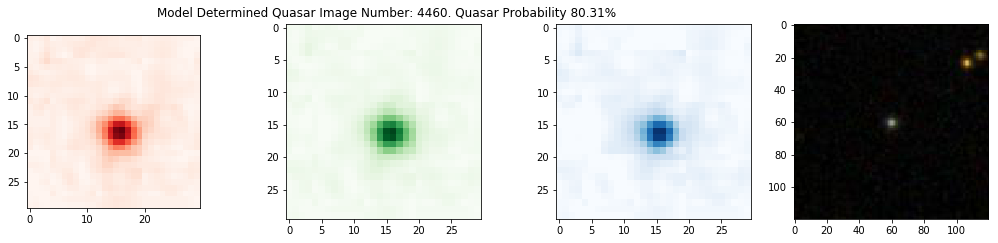

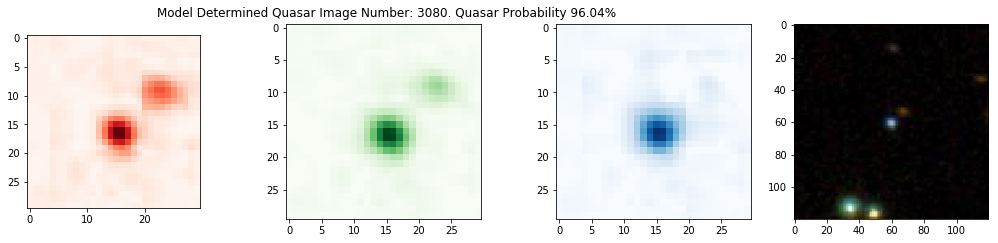

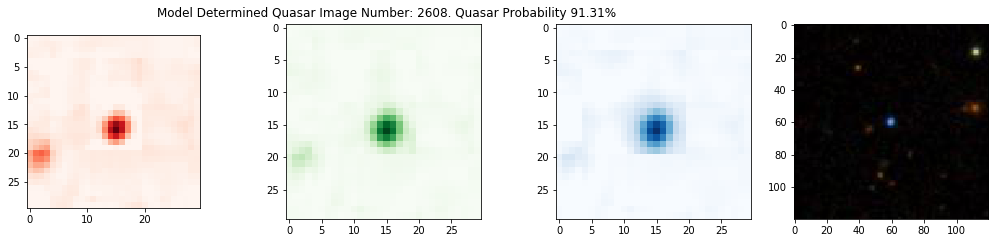

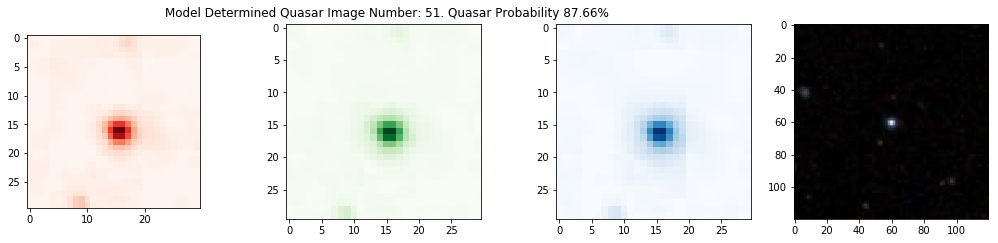

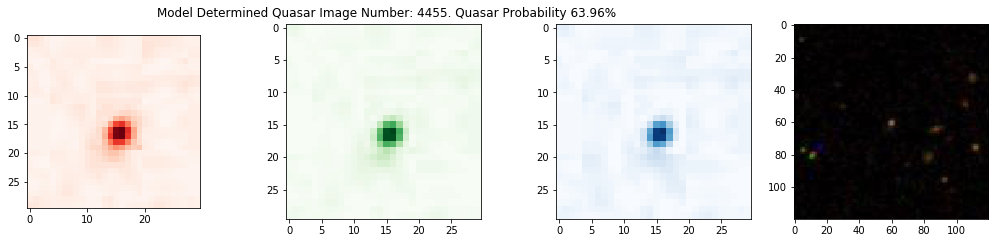

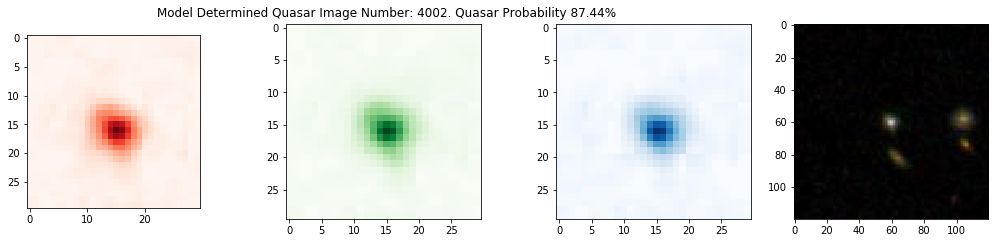

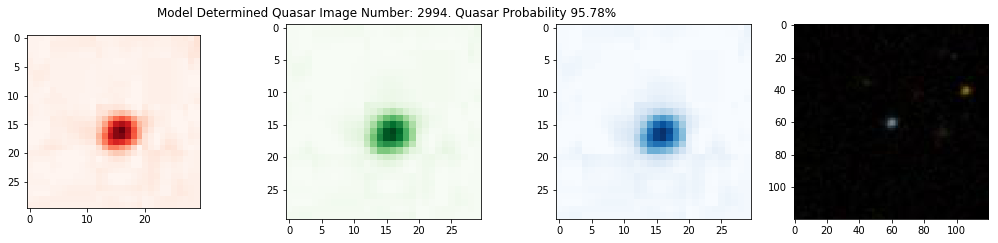

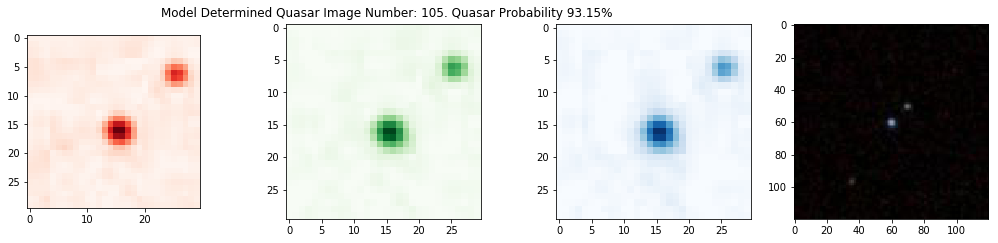

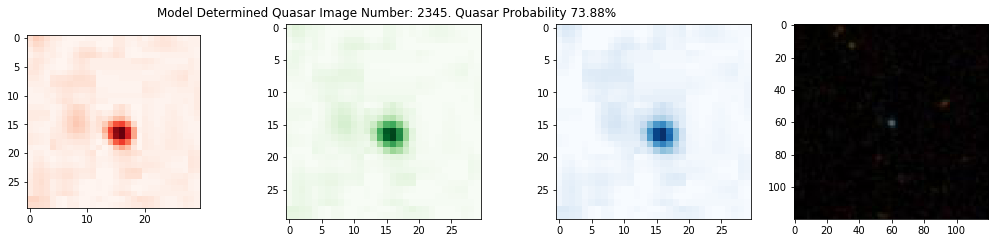

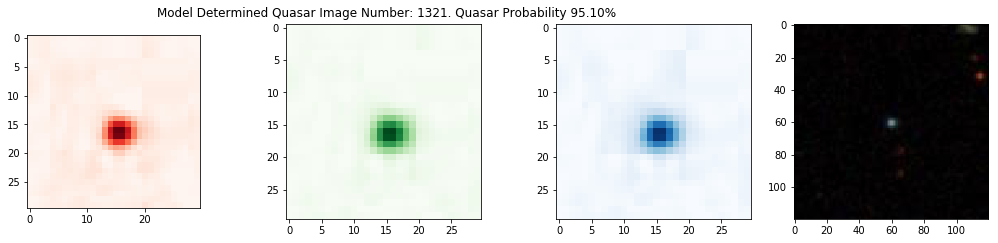

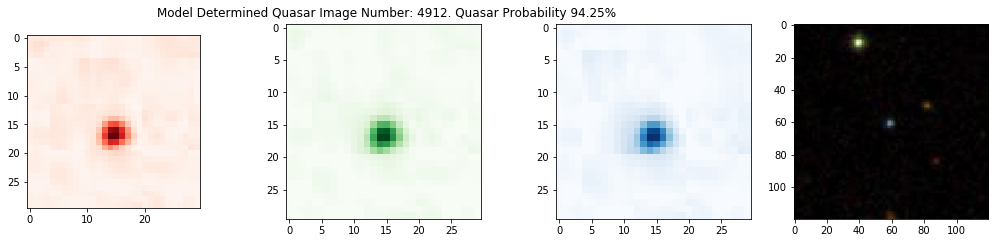

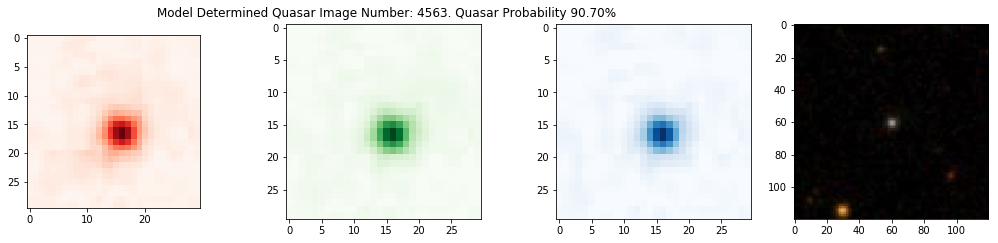

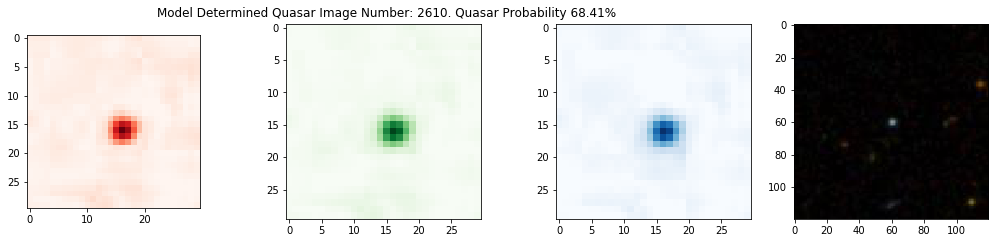

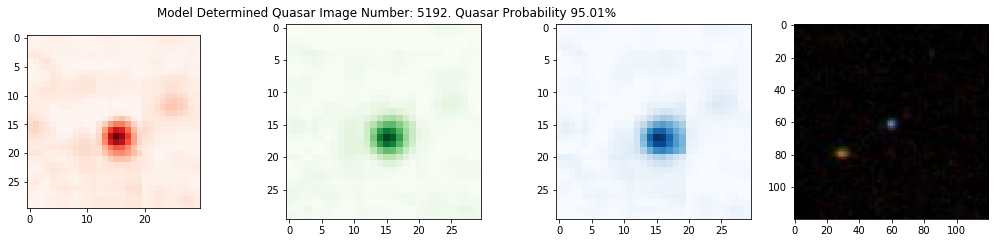

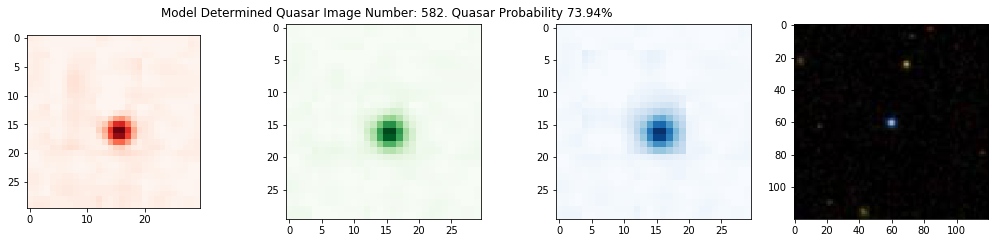

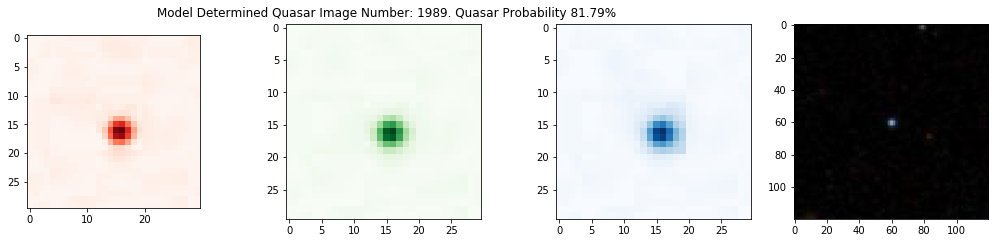

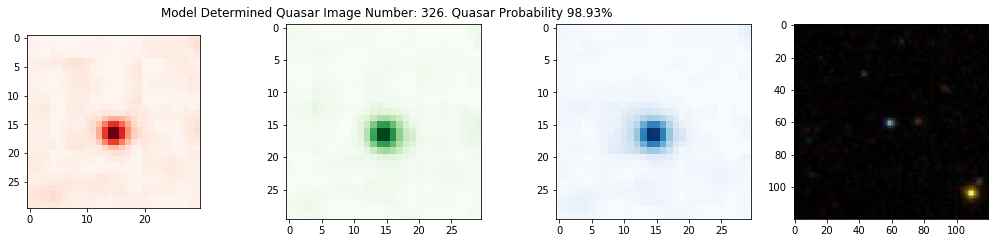

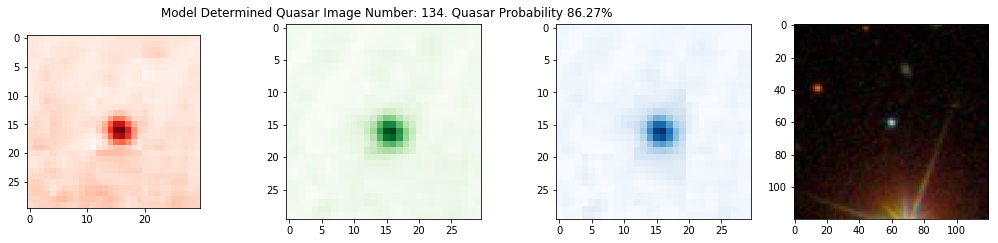

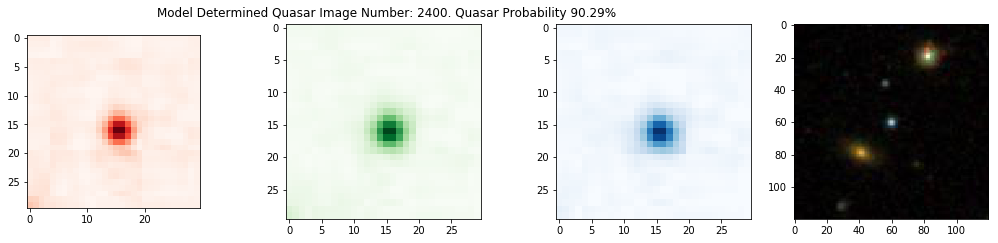

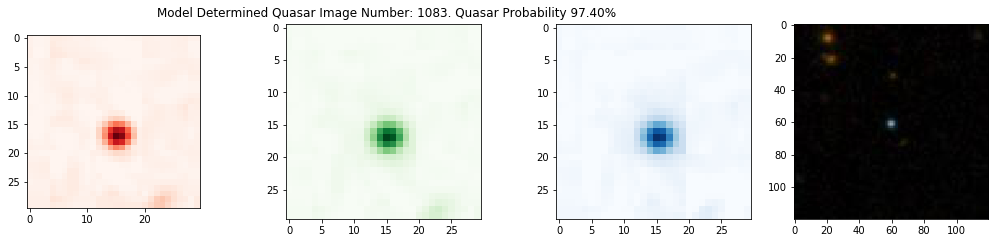

In [ ]:
positives = Classification[Classification['QuasarProbability']>=0.5]
# Viewing the positives
pos_sample = positives.sample(20)
for ind in pos_sample.index:
    imageplot = plt.figure(figsize=(10,3))
    axis1 = imageplot.add_axes([0,0,.24,.9])
    axis1.imshow(input_images[ind,:,:,0], cmap='Reds')
    axis2 = imageplot.add_axes([.25,0,.49,.9])
    axis2.imshow(input_images[ind,:,:,1], cmap='Greens')
    axis3 = imageplot.add_axes([.50,0,.74,.9])
    axis3.imshow(input_images[ind,:,:,2], cmap='Blues')
    axis4 = imageplot.add_axes([.75,0,.9,.9])
    current_img = positives.loc[ind]['Filename']
    axis4.imshow(Image.open(current_img ))
    imageplot.suptitle('Model Determined Quasar Image Number: %s. Quasar Probability %.2f%%' % (str(ind),(positives.loc[ind]['QuasarProbability']*100)))

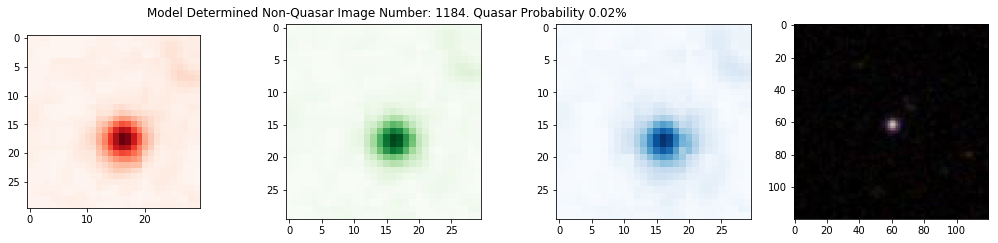

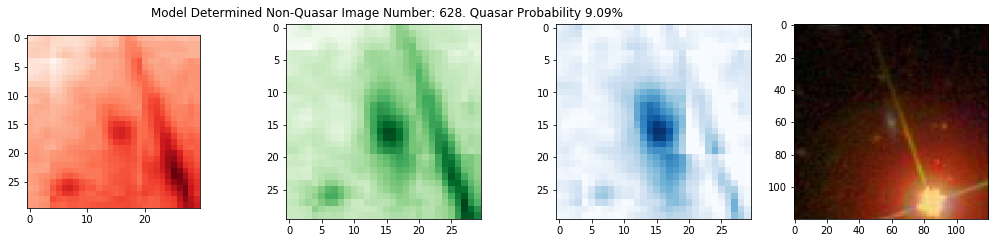

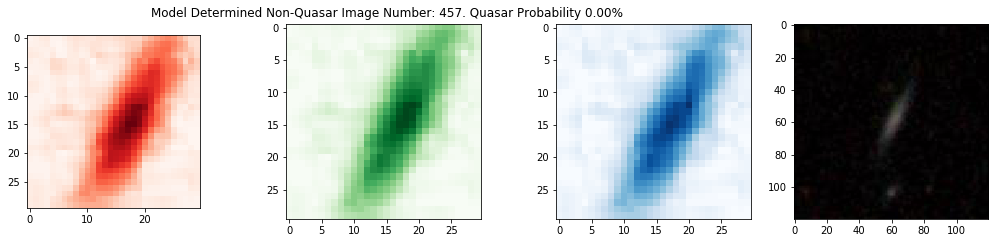

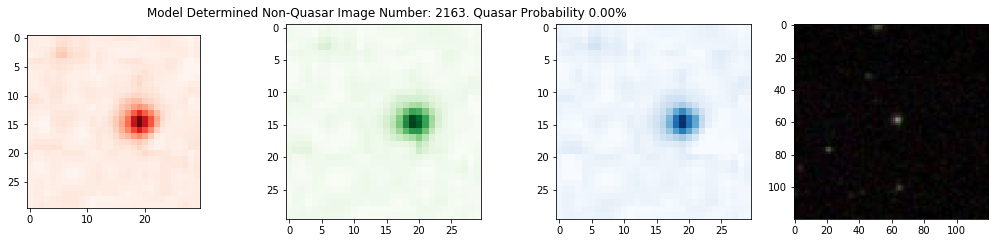

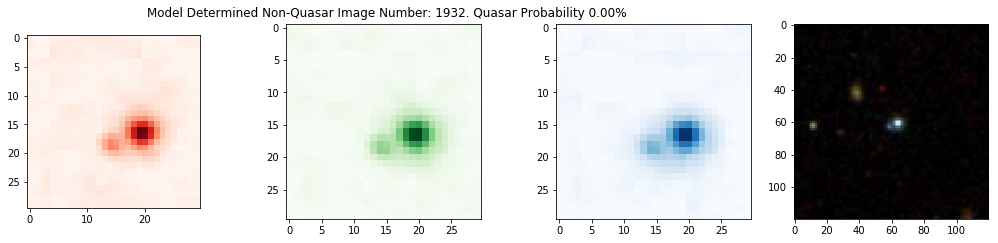

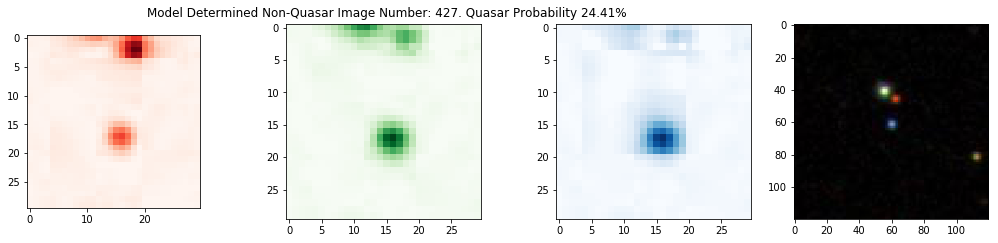

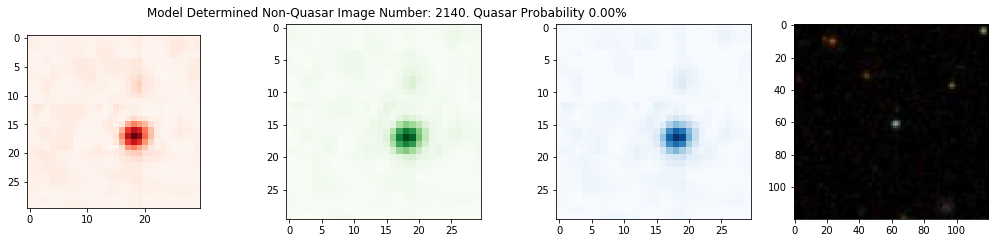

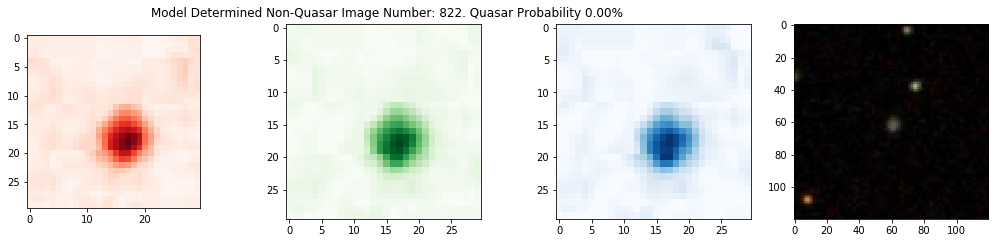

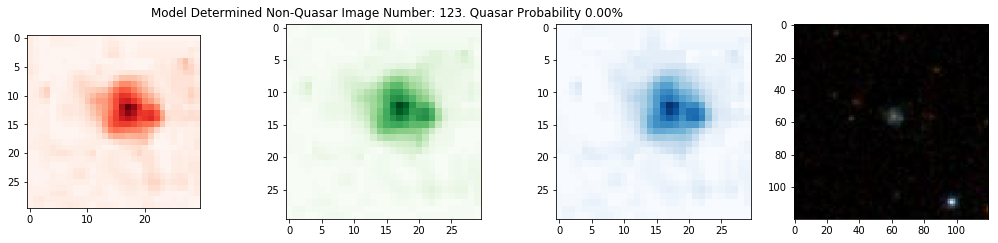

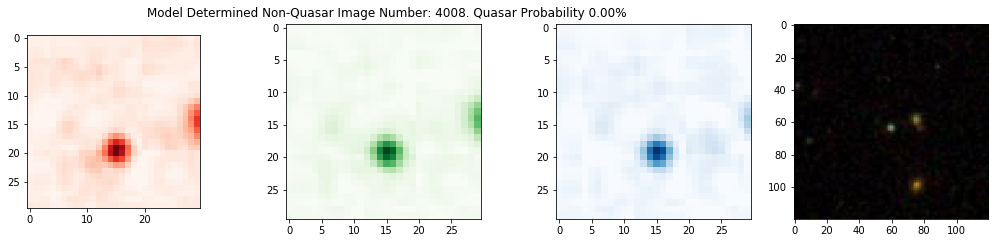

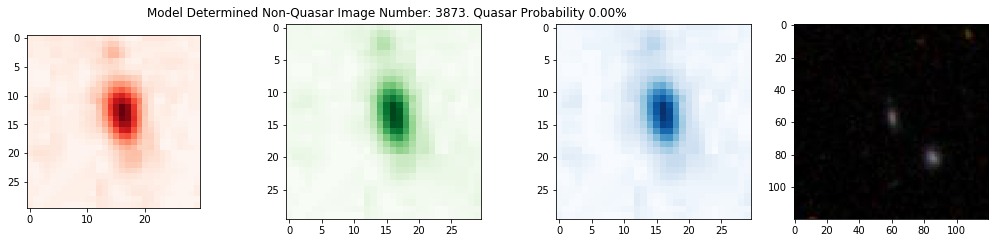

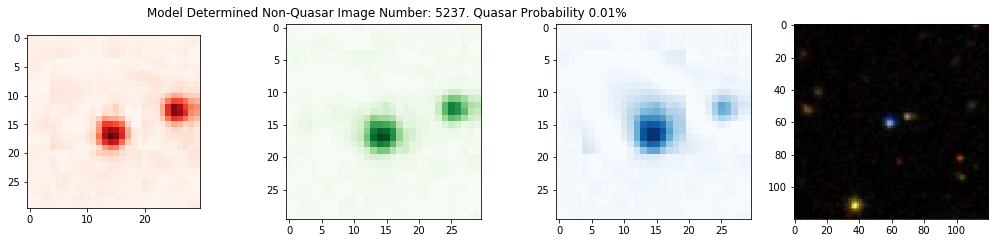

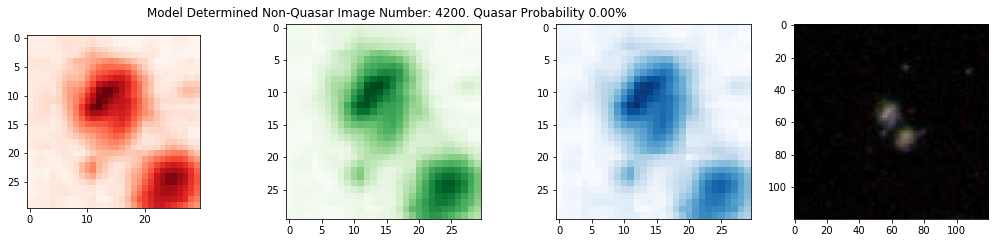

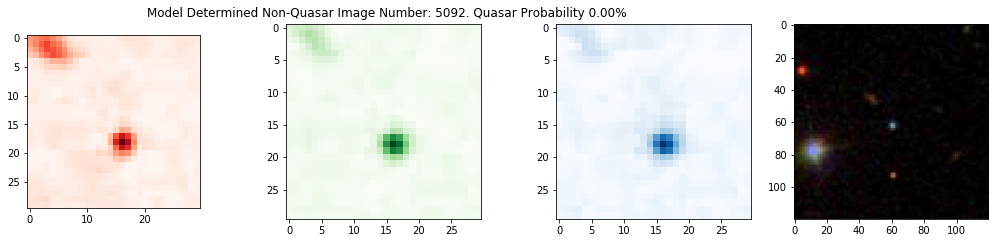

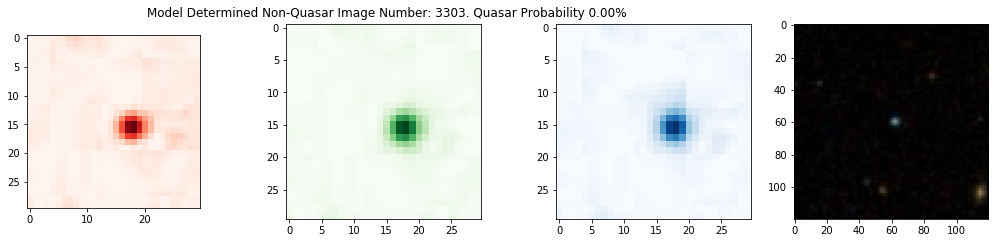

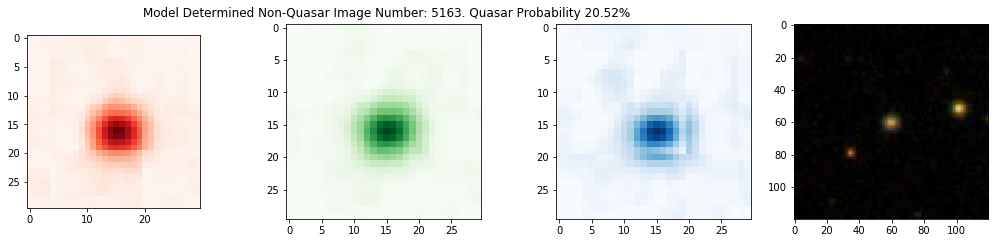

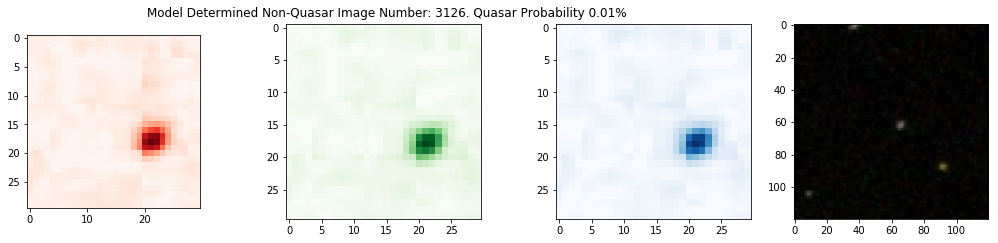

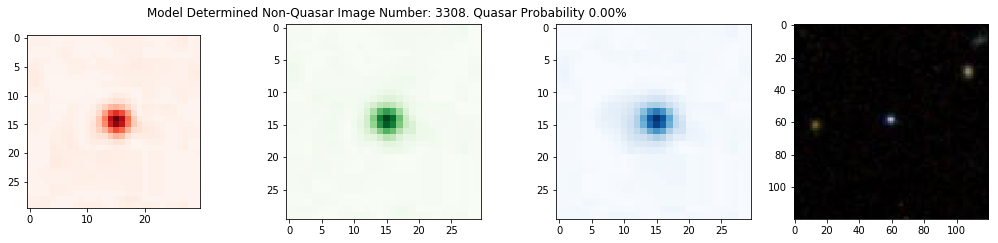

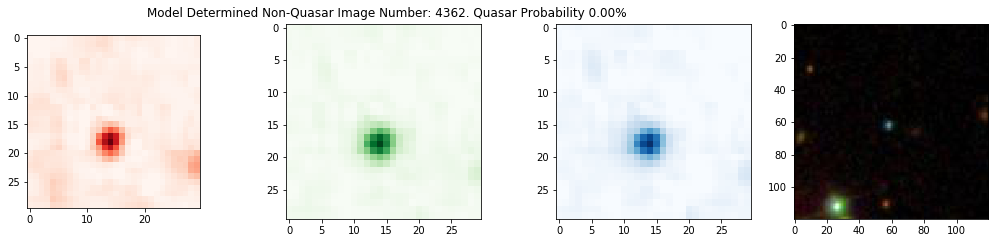

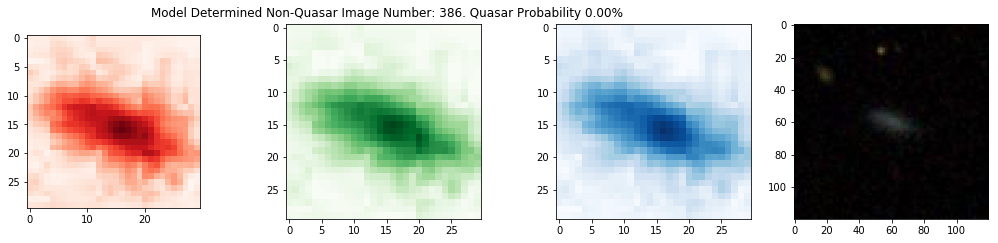

In [ ]:
negatives = Classification[Classification['QuasarProbability']<0.5]
# Viewing the negatives
neg_sample = negatives.sample(20)
for ind in neg_sample.index:
    imageplot = plt.figure(figsize=(10,3))
    axis1 = imageplot.add_axes([0,0,.24,.9])
    axis1.imshow(input_images[ind,:,:,0], cmap='Reds')
    axis2 = imageplot.add_axes([.25,0,.49,.9])
    axis2.imshow(input_images[ind,:,:,1], cmap='Greens')
    axis3 = imageplot.add_axes([.50,0,.74,.9])
    axis3.imshow(input_images[ind,:,:,2], cmap='Blues')
    axis4 = imageplot.add_axes([.75,0,.9,.9])
    current_img = negatives.loc[ind]['Filename']
    axis4.imshow(Image.open(current_img ))
    imageplot.suptitle('Model Determined Non-Quasar Image Number: %s. Quasar Probability %.2f%%' % (str(ind),(negatives.loc[ind]['QuasarProbability']*100)))

## Data Merging and Saving

We will merge these probabilities into the QuasarCandidate.csv file.

In [ ]:
QuasarCandidates = pd.read_csv('QuasarCandidatesData.csv')

In [ ]:
QuasarCandidates.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
0,b'SDSS J082207.76+034040.3',08 22 07.762,+03 40 40.39,7.0,7.0,83.0,75.0,0.0,C,O,b'2009yCat.2294....0A'
1,b'4C 07.25',08 30 05.3,+07 45 46,5.0,5.0,NaN,NaN,0.0,D,NaN,b''
2,b'SDSS J082847.31+090335.2',08 28 47.312,+09 03 35.22,7.0,7.0,74.0,69.0,0.0,C,O,b'2009yCat.2294....0A'
3,b'NVSS J081429+090749',08 14 29.085,+09 07 48.52,7.0,7.0,159.0,121.0,0.0,C,O,b'2009yCat.2294....0A'
4,b'2MASS J08221083+0743435',08 22 10.830,+07 43 43.59,7.0,7.0,170.0,100.0,90.0,B,N,b'2003yCat.2246....0C'


In [ ]:
QuasarCandidates.tail()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
5413,b'USNO-A2.0 1425-08394781',15 53 37.759,+57 48 38.81,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A'
5414,b'USNO-A2.0 1425-08369481',15 46 26.011,+58 21 11.34,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A'
5415,b'GALEX 2680919436624400066',15 54 13.375,+58 11 33.90,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A'
5416,b'USNO-A2.0 1425-08408588',15 57 41.299,+56 01 23.63,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A'
5417,b'USNO-A2.0 1425-08387451',15 51 26.251,+57 53 54.28,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A'


The index of the QuasarCandidates is the number attached to the Quasar Candidate images. As is this not the index of the Classification dataframe we must join these two dataframes on the index of the QuasarCandidates dataframe and index in the Filename of the Classifcation dataframe.

In [ ]:
# Create an index column for the join in the QuasarCandidates dataframe
QuasarCandidates.reset_index(inplace=True)

In [ ]:
# Remove the index of the Filenames in the Classification dataframe
# We achieve this by splitting after the '_' and before the '.' in each filename.
# We also require the ImageNumber to be an integer to join with the index of QuasarCandidates.
Classification['ImageNumber'] = Classification['Filename'].apply(lambda name: int(name.split(sep='_')[1].split(sep='.')[0]))

In [ ]:
Classification.head()

,Filename,QuasarProbability,ImageNumber
0,./Images/QuasarCandidate_0.jpg,2.054069e-03,0
1,./Images/QuasarCandidate_1.jpg,7.893622e-04,1
2,./Images/QuasarCandidate_10.jpg,5.142104e-01,10
3,./Images/QuasarCandidate_100.jpg,5.032817e-07,100
4,./Images/QuasarCandidate_1000.jpg,1.429217e-02,1000


In [ ]:
OutputDF = pd.merge(QuasarCandidates,Classification, 'inner', left_on='index', right_on='ImageNumber')

In [ ]:
OutputDF.head()

,index,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Filename,QuasarProbability,ImageNumber
0,0,b'SDSS J082207.76+034040.3',08 22 07.762,+03 40 40.39,7.0,7.0,83.0,75.0,0.0,C,O,b'2009yCat.2294....0A',./Images/QuasarCandidate_0.jpg,0.002054,0
1,1,b'4C 07.25',08 30 05.3,+07 45 46,5.0,5.0,NaN,NaN,0.0,D,NaN,b'',./Images/QuasarCandidate_1.jpg,0.000789,1
2,2,b'SDSS J082847.31+090335.2',08 28 47.312,+09 03 35.22,7.0,7.0,74.0,69.0,0.0,C,O,b'2009yCat.2294....0A',./Images/QuasarCandidate_2.jpg,0.006372,2
3,3,b'NVSS J081429+090749',08 14 29.085,+09 07 48.52,7.0,7.0,159.0,121.0,0.0,C,O,b'2009yCat.2294....0A',./Images/QuasarCandidate_3.jpg,0.000283,3
4,4,b'2MASS J08221083+0743435',08 22 10.830,+07 43 43.59,7.0,7.0,170.0,100.0,90.0,B,N,b'2003yCat.2246....0C',./Images/QuasarCandidate_4.jpg,0.789163,4


In [ ]:
OutputDF.tail()

,index,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Filename,QuasarProbability,ImageNumber
5413,5413,b'USNO-A2.0 1425-08394781',15 53 37.759,+57 48 38.81,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A',./Images/QuasarCandidate_5413.jpg,3.936225e-11,5413
5414,5414,b'USNO-A2.0 1425-08369481',15 46 26.011,+58 21 11.34,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A',./Images/QuasarCandidate_5414.jpg,9.790732e-01,5414
5415,5415,b'GALEX 2680919436624400066',15 54 13.375,+58 11 33.90,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A',./Images/QuasarCandidate_5415.jpg,6.681010e-04,5415
5416,5416,b'USNO-A2.0 1425-08408588',15 57 41.299,+56 01 23.63,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A',./Images/QuasarCandidate_5416.jpg,4.070207e-12,5416
5417,5417,b'USNO-A2.0 1425-08387451',15 51 26.251,+57 53 54.28,7.0,7.0,NaN,NaN,0.0,D,NaN,b'2007ApJ...664...53A',./Images/QuasarCandidate_5417.jpg,1.168489e-06,5417


In [ ]:
OutputDF.drop(['index','ImageNumber'],axis=1, inplace=True)

In [ ]:
OutputDF.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Filename,QuasarProbability
0,b'SDSS J082207.76+034040.3',08 22 07.762,+03 40 40.39,7.0,7.0,83.0,75.0,0.0,C,O,b'2009yCat.2294....0A',./Images/QuasarCandidate_0.jpg,0.002054
1,b'4C 07.25',08 30 05.3,+07 45 46,5.0,5.0,NaN,NaN,0.0,D,NaN,b'',./Images/QuasarCandidate_1.jpg,0.000789
2,b'SDSS J082847.31+090335.2',08 28 47.312,+09 03 35.22,7.0,7.0,74.0,69.0,0.0,C,O,b'2009yCat.2294....0A',./Images/QuasarCandidate_2.jpg,0.006372
3,b'NVSS J081429+090749',08 14 29.085,+09 07 48.52,7.0,7.0,159.0,121.0,0.0,C,O,b'2009yCat.2294....0A',./Images/QuasarCandidate_3.jpg,0.000283
4,b'2MASS J08221083+0743435',08 22 10.830,+07 43 43.59,7.0,7.0,170.0,100.0,90.0,B,N,b'2003yCat.2246....0C',./Images/QuasarCandidate_4.jpg,0.789163


In [ ]:
OutputDF.to_csv('QuasarCandidateDataWithClassification.csv', index=False)